In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport

In [2]:
Nx=20
Ny=20

In [3]:
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.25], simplex=False)

In [4]:
parameter={"aperture":1e-3,
          #"fracture_perm":1e4,
          "fracture_perm":1,
          "perm":1,
          "f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          #"f_lambda":lambda x,y,z:0.0,
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

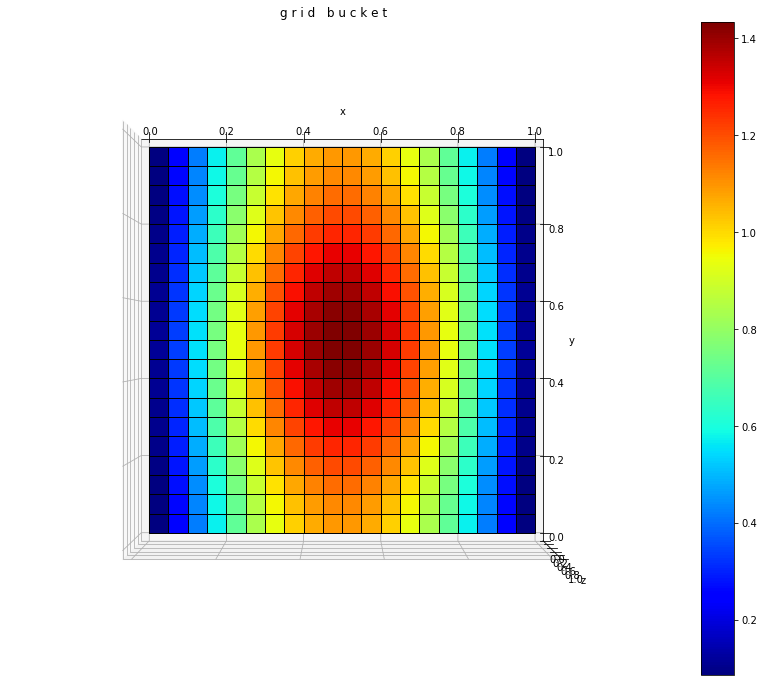

In [5]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [6]:
parameter={
    "aperture":1e-4,
    "por":0.2,
    "por_frac":0.8,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"t_max":1 /3,
    #"t_max":345600,
    "t_max":7000,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)


In [7]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
Ca="Ca"

In [8]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)

mass
  (0, 0)	0.0005000000000000001
  (1, 1)	0.0005000000000000001
  (2, 2)	0.0005000000000000002
  (3, 3)	0.0004999999999999999
  (4, 4)	0.0004999999999999999
  (5, 5)	0.0005000000000000004
  (6, 6)	0.0004999999999999999
  (7, 7)	0.0004999999999999999
  (8, 8)	0.0004999999999999999
  (9, 9)	0.0004999999999999999
  (10, 10)	0.0005000000000000004
  (11, 11)	0.0005000000000000004
  (12, 12)	0.0004999999999999995
  (13, 13)	0.0005000000000000004
  (14, 14)	0.0004999999999999995
  (15, 15)	0.0005000000000000004
  (16, 16)	0.0005000000000000004
  (17, 17)	0.0004999999999999995
  (18, 18)	0.0005000000000000004
  (19, 19)	0.0004999999999999995
  (20, 20)	0.0005000000000000001
  (21, 21)	0.0005000000000000001
  (22, 22)	0.0005000000000000002
  (23, 23)	0.0004999999999999999
  (24, 24)	0.0004999999999999999
  :	:
  (376, 376)	0.0005000000000000009
  (377, 377)	0.0004999999999999998
  (378, 378)	0.0005000000000000009
  (379, 379)	0.0004999999999999998
  (380, 380)	0.0004999999999999995
  (381, 3

P0_flux
[[-3.42042641 -3.3361981  -3.16981616 ...  3.16973639  3.3360969
   3.42031395]
 [-0.01814977 -0.05400222 -0.08852443 ...  0.08851138  0.05399385
   0.01814689]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
P0_flux
[[0.]
 [0.]
 [0.]]
pressure
[0.08604035 0.25600229 0.41966016 0.57298391 0.71219805 0.83387464
 0.93501768 1.01313688 1.06630894 1.09322483 1.09322204 1.06630082
 1.01312418 0.93500159 0.8338567  0.71218001 0.57296757 0.41964716
 0.25599393 0.08603747 0.08785533 0.26140251 0.4285126  0.58507051
 0.72722107 0.85146404 0.95474026 1.03450695 1.08880027 1.11628366
 1.11628061 1.08879141 1.03449306 0.95472263 0.85144435 0.72720124
 0.58505253 0.42849829 0.26139331 0.08785215 0.09092991 0.27055053
 0.44350869 0.60554522 0.75267    0.88126028 0.9881499  1.07070722
 1.12689979 1.15534435 1.15534078 1.12688939 1.07069086 0.98812905
 0.88123689 0.75264639 0.60552379 0.44349164 0.27053958 0.09092614
 0.09476203 0.28195247 0.46219955 0.63106447 0.7843

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


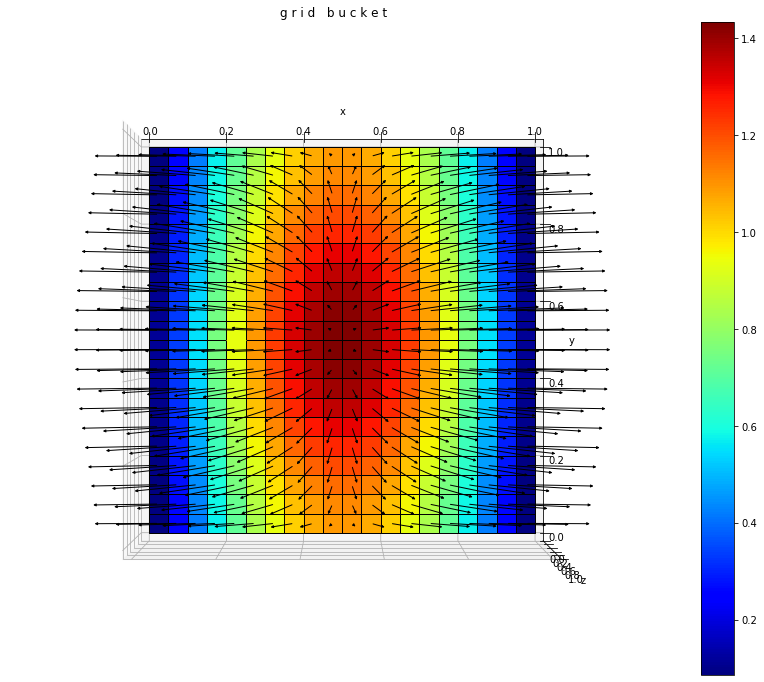

In [9]:
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=0.05
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))